In [1]:
import keras
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input

In [2]:
from google.colab import files
files.upload()
!mkdir -p  ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d jerrinbright/mars-orbital

 91% 41.0M/45.1M [00:02<00:00, 10.6MB/s]
100% 45.1M/45.1M [00:02<00:00, 22.3MB/s]


In [4]:
import zipfile
local_zip = '/content/mars-orbital.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [45]:
img_width = 224
img_height = 224

datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.3, width_shift_range=0.1, 
                                      height_shift_range=0.2, zoom_range=0.15, horizontal_flip=True, fill_mode='reflect', samplewise_center=True, 
                                      samplewise_std_normalization=True)
# 1) TRAINING SET
train_generator = datagen.flow_from_directory(directory='/content/MarsOrbital/Mars', 
                                                   target_size=(img_width, img_height),
                                                   class_mode='categorical',
                                                   batch_size=32,
                                                   subset='training'
                                                   )
# 2)CROSS VALIDATION SET
validation_generator = datagen.flow_from_directory(directory='/content/MarsOrbital/Mars',
                                                    target_size=(img_width,img_height),
                                                    class_mode='categorical',
                                                    batch_size=64,
                                                    subset='validation'
                                                   )

test_generator = datagen.flow_from_directory(directory='/content/MarsOrbital/Test',
                                                    target_size=(img_width,img_height),
                                                    class_mode='categorical',
                                                    batch_size=32,
                                                   ) 

Found 2660 images belonging to 6 classes.
Found 1136 images belonging to 6 classes.
Found 24 images belonging to 6 classes.


In [11]:
#instantiate a base model with pre-trained weigts.
base_model=keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224,224,3))

58892288/58889256 [==============================] - 0s 0us/step


In [12]:
#freeze the base model
base_model.trainable = False

In [13]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(2048,activation='relu',kernel_initializer='he_normal'))
model.add(Dropout(0.35))
model.add(Dense(6,activation='softmax',kernel_initializer='glorot_normal'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              51382272  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              4196352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1

In [15]:
model.compile(optimizer=keras.optimizers.Adam(1e-4),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs = 20, validation_data = validation_generator,workers = 10, use_multiprocessing = True)

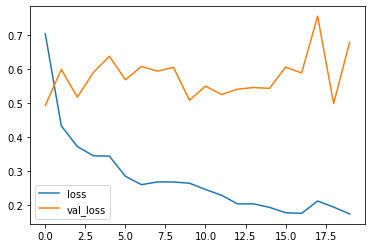

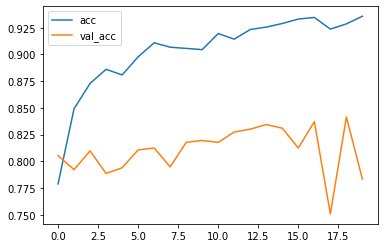

In [17]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [18]:
model.save("/content/mars.h5")

In [39]:
!kaggle datasets download -d jerrinbright/mars-orbital

 90% 41.0M/45.5M [00:02<00:00, 12.1MB/s]
100% 45.5M/45.5M [00:02<00:00, 21.5MB/s]


In [40]:
import zipfile
local_zip = '/content/mars-orbital.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [47]:
history = model.fit(train_generator, epochs = 20, validation_data = validation_generator,workers = 10, use_multiprocessing = True)

Epoch 1/20
84/84 [==============================] - 57s 641ms/step - loss: 0.1678 - accuracy: 0.9417 - val_loss: 0.5692 - val_accuracy: 0.8301
Epoch 2/20
84/84 [==============================] - 58s 637ms/step - loss: 0.1620 - accuracy: 0.9376 - val_loss: 0.5965 - val_accuracy: 0.8327
Epoch 3/20
84/84 [==============================] - 57s 626ms/step - loss: 0.1614 - accuracy: 0.9398 - val_loss: 0.7232 - val_accuracy: 0.8160
Epoch 4/20
84/84 [==============================] - 57s 625ms/step - loss: 0.1872 - accuracy: 0.9338 - val_loss: 0.6142 - val_accuracy: 0.8231
Epoch 5/20
84/84 [==============================] - 58s 637ms/step - loss: 0.1598 - accuracy: 0.9316 - val_loss: 0.5891 - val_accuracy: 0.8222
Epoch 6/20
84/84 [==============================] - 58s 645ms/step - loss: 0.1396 - accuracy: 0.9462 - val_loss: 0.6212 - val_accuracy: 0.8319
Epoch 7/20
84/84 [==============================] - 58s 640ms/step - loss: 0.1544 - accuracy: 0.9474 - val_loss: 0.6422 - val_accuracy: 0.8187

In [ ]:
model.evaluate(test_generator)